In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random 

In [2]:
m=40 

X0=np.ones((m,1))
X1=np.arange(1,m+1).reshape(m,1)
X=np.hstack((X0,X1))

In [3]:
X.shape[0]

40

In [4]:
# Y=np.array([
#     3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
#     11, 13, 13, 16, 17, 18, 17, 19, 21,
#     22,23,24,27,29,30,21,20,29,28
# ]).reshape(m,1)
Y=np.array([3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 
            12,11, 13, 13, 16, 17, 18, 17, 19, 21,
            22,23,24,27,29,30,21,20,29,28,
            31,32,33,35,36,37,38,39,42,40]).reshape(m,1)

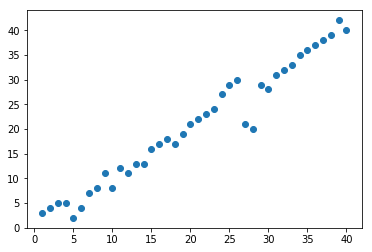

In [5]:
plt.scatter(X1,Y)

# 开始随机梯度下降计算参数

In [6]:
#随机梯度下降算法
def gradient_descent(x,y,alpha,threshold,maxIter):
    cnt=0
    loss={}
    #初始化theta,[theta0,theta1]=[2,3]
    theta=np.array([2,3]).reshape(2,1)
    #计算梯度
    gradient,sample=gradient_func(x,y,theta)
    #计算误差
    error=errors_func(x,y,theta,sample)
    loss[cnt]=error
    while not np.all(np.absolute(gradient) <= threshold) and cnt<maxIter:
        cnt=cnt+1
        #利用梯度更新参数，参数是求解最优模型的目标
        theta=theta-alpha*gradient
        #计算梯度
        gradient,sample=gradient_func(x,y,theta)
        #计算误差
        error=errors_func(x,y,theta,sample)
        loss[cnt]=error
    print('迭代到第{}次，结束迭代！'.format(cnt))
    #画出loss函数
    lossdf=pd.DataFrame.from_dict(loss,orient='index')
    plt.plot(lossdf)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(labels=['loss'])
    plt.show()
    return theta
    
#计算梯度的函数
def gradient_func(x,y,theta):
    #随机选取一个样本,sample是随机选取样本在数组中的索引
    sample=random.randrange(0,x.shape[0],1)
    #计算预测值和真实值的误差
    diff=np.dot(x[sample],theta)-y[sample]
    #计算梯度
    grad=(x[sample]*diff[0]).reshape(theta.shape[0],theta.shape[1])
    return grad,sample
    
#计算误差的函数
def errors_func(x,y,theta,sample):
    #预测值减真实值，得到误差
    diff=np.dot(x[sample],theta)-y[sample]
    #误差的平方和
    error=0.5*np.dot(np.transpose(diff),diff)
    #返回误差
    return error

迭代到第50次，结束迭代！


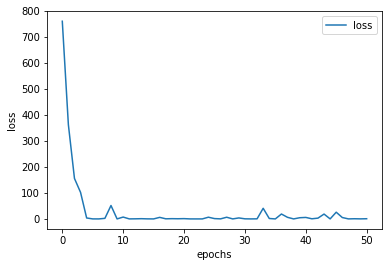

In [7]:
alpha=0.001
thresh=1e-2
maxIter=50
theta_res=gradient_descent(X,Y,alpha,thresh,maxIter)

In [8]:
print("optimal theta:",theta_res)
theta_res.shape

optimal theta: [[1.89727358]
 [0.94524215]]


(2, 1)

In [9]:
Y_p=np.dot(X,theta_res)

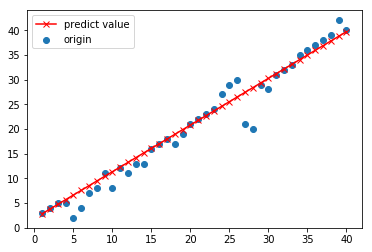

In [10]:
plt.scatter(X1,Y)
plt.plot(X1,Y_p,'r-x',label=['predict value'])
plt.legend(labels=['predict value','origin'])